In [1]:
# https://github.com/LCAV/pyroomacoustics/blob/master/examples/noise_reduction_spectral_subtraction.py

In [6]:
from pyroomacoustics.denoise import SpectralSub
import pyroomacoustics as pra
import time

In [42]:
import librosa
import os
BASE_FOLDER =  r'../../'
filepath = r'\dataset\min6dB\pump\id_02\normal\00000002.wav'
ch, sr = librosa.load(os.path.abspath(BASE_FOLDER+filepath), sr=None, mono=False)
noisy_signal = ch[0]

In [43]:
%run -i ..\..\utility\feature_extractor\JupyterLoad_feature_extractor.py
def psd(d):
    psd = feature_extractor_welchPSD(BASE_FOLDER)
    mf = memory_wave_file()
    mf.filepath = filename
    mf.srate = fs
    mf.channel = d
    psd.create_from_wav(mf)
    psd.plot()
    plt.show()

load feature_extractor_mother
load feature_extractor_mel_spectra
load feature_extractor_psd
load feature_extractore_pre_nnFilterDenoise
load extractor_diagram_mother


In [44]:
from IPython.display import display, Markdown, Audio

In [45]:
# the number of LPC coefficients to consider
db_reduc = 100    # Maximum suppression per frequency bin. Large suppresion can result in more musical noise.
nfft = 512      # Frame length will be nfft/2 as we will use an STFT with 50% overlap.
lookback = 48   # How many frames to look back for the noise floor estimate.
beta = 30 # An overestimation factor to "push" the suppression towards db_reduc.
alpha = 1.8     # An exponential factor to tune the suppresion (see documentation of 'SpectralSub').
fs = sr
"""
Create STFT and SCNR objects
"""
hop = nfft // 2
window = pra.hann(nfft, flag='asymmetric', length='full')
stft = pra.transform.STFT(nfft, hop=hop, analysis_window=window,
                          streaming=True)

scnr = SpectralSub(nfft, db_reduc, lookback, beta, alpha)
lookback_time = hop/fs * lookback
print("Lookback : %f seconds" % lookback_time)

"""
Process as in real-time
"""
noisy_signal = pra.normalize(noisy_signal)
processed_audio = np.zeros(noisy_signal.shape)
n = 0
start_time = time.time()
while noisy_signal.shape[0] - n >= hop:

    # SCNR in frequency domain
    stft.analysis(noisy_signal[n:(n+hop), ])
    gain_filt = scnr.compute_gain_filter(stft.X)

    # back to time domain
    processed_audio[n:n+hop, ] = stft.synthesis(gain_filt*stft.X)

    # update step
    n += hop




# end      
processed_audio = pra.normalize(processed_audio)
proc_time = time.time() - start_time
print("Processing time: {} minutes".format(proc_time/60))

Lookback : 0.768000 seconds
Processing time: 0.006576891740163167 minutes


In [46]:
noisy_signal.shape[0] 

160000

#### orginal

#### denoised

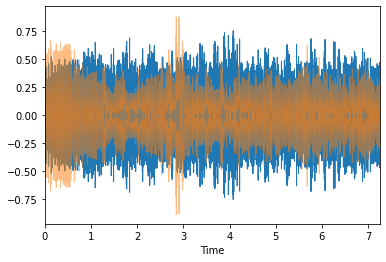

In [47]:
display(Markdown('#### ' + 'orginal'))
display(Audio(data=noisy_signal,rate=sr))

plt.show()
#psd(data)

display(Markdown('#### ' + 'denoised'))
display(Audio(data=processed_audio,rate=sr))

librosa.display.waveplot(noisy_signal,sr)
librosa.display.waveplot(processed_audio,alpha=0.5)

plt.show()
#psd(data)